In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [7]:
auto=pd.read_csv('sale.csv')
auto

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402
5,Month-6,Region - A,Manager - B,137163,256948
6,Month-7,Region - C,Manager - C,130625,222106
7,Month-8,Region - A,Manager - A,131140,230637
8,Month-9,Region - B,Manager - C,171259,226261
9,Month-10,Region - C,Manager - B,141956,193735


# The company wishes to clarify whether there is any increase in sales after
stepping into digital marketing

In [8]:
auto.describe(include='all')

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22,22,22,22.000000,22.000000
unique,22,3,3,NaN,NaN
top,Month-1,Region - A,Manager - A,NaN,NaN
freq,1,10,9,NaN,NaN
mean,NaN,NaN,NaN,149239.954545,231123.727273
std,NaN,NaN,NaN,14844.042921,25556.777061
min,NaN,NaN,NaN,130263.000000,187305.000000
25%,NaN,NaN,NaN,138087.750000,214960.750000
50%,NaN,NaN,NaN,147444.000000,229986.500000
75%,NaN,NaN,NaN,157627.500000,250909.000000


# The company wishes to clarify whether there is any increase in sales after stepping into digital marketing.

In [9]:
a=auto['Sales_before_digital_add(in $)']
b=auto['Sales_After_digital_add(in $)']

In [10]:
stats.shapiro(a)

ShapiroResult(statistic=0.9306764006614685, pvalue=0.12674309313297272)

In [11]:
stats.shapiro(b)

ShapiroResult(statistic=0.9702128767967224, pvalue=0.7159645557403564)

# here the both cases ,pvalue>0.05(alphavalue),so the distribution is normal

In [12]:
stats.levene(a,b,center='mean')

LeveneResult(statistic=5.171664124853503, pvalue=0.028130575490495715)

In [13]:
stats.ttest_ind(a,b,equal_var=False)

Ttest_indResult(statistic=-12.995084451110877, pvalue=1.1019671619608604e-14)

In [14]:
pvalue=1.1019671619608604e-14
if(pvalue<0.05):
    print('There is no increase in sales after stepping into digital marketing')
else:
    print('There is increase in sales after stepping into digital marketing')

There is no increase in sales after stepping into digital marketing


<AxesSubplot:ylabel='Density'>

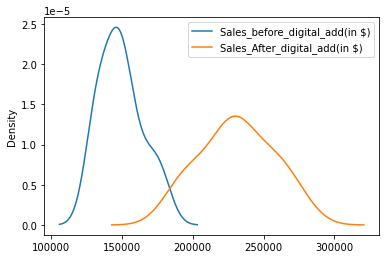

In [15]:
auto[['Sales_before_digital_add(in $)','Sales_After_digital_add(in $)']].plot.kde()

# The company needs to check whether there is any dependency between the features “Region” and “Manager”.

In [16]:
abc=pd.crosstab(auto['Region'],auto['Manager'])
abc

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


In [17]:
chi=stats.chi2_contingency(abc)
chi

(3.050566893424036,
 0.5493991051158094,
 4,
 array([[4.09090909, 3.18181818, 2.72727273],
        [2.86363636, 2.22727273, 1.90909091],
        [2.04545455, 1.59090909, 1.36363636]]))

In [18]:
chi_Stat_value=chi[0]
p_val=chi[1]
d_o_f=chi[2]
alpha=0.05

In [19]:
chi_critical=stats.chi2.ppf(q=1-alpha,df=d_o_f)
print('critical value',chi_critical)

critical value 9.487729036781154


In [20]:
if(chi_Stat_value>=chi_critical)&(p_val<=alpha):
    print('Reject null hypothesis and there is dependency between variables')
else:
    print('Accept null hypothesis and there is no dependency between variables')

Accept null hypothesis and there is no dependency between variables
